#  Quantum Communication | Surface Code

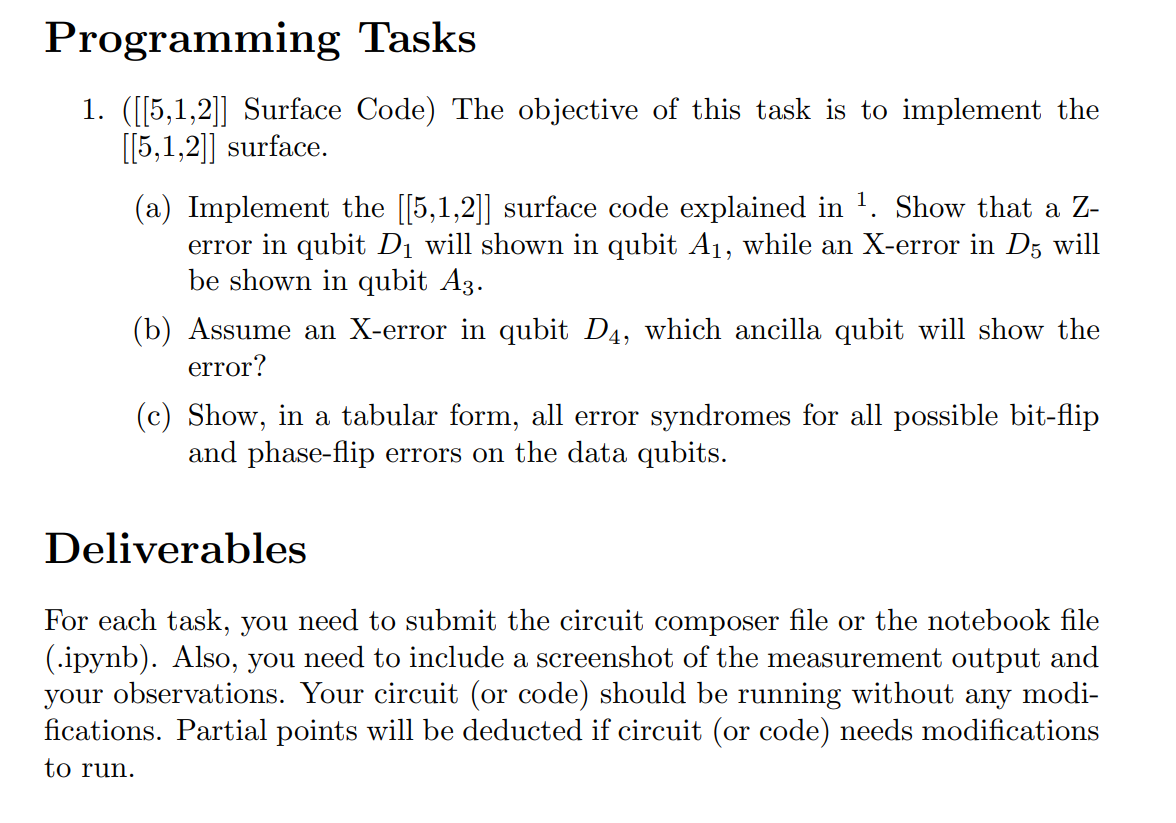

### Notice
> I am updating the names to ensure consistency with the code and circuit:

<table style="width:66%; border: 1px solid black;">
    <tr>
        <td style="vertical-align: top;">
            $$
            \begin{align*}
                D_1 \rightarrow D_0 \\
                D_2 \rightarrow D_1 \\
                D_3 \rightarrow D_2 \\
                D_4 \rightarrow D_3 \\
                D_5 \rightarrow D_4 \\
            \end{align*}
            $$
        </td>
        <td style="vertical-align: top;">
            $$
            \begin{align*}
                A_1 \rightarrow A_0 \\
                A_2 \rightarrow A_1 \\
                A_3 \rightarrow A_2 \\
                A_4 \rightarrow A_3 \\
            \end{align*}
            $$
        </td>
    </tr>
    <tr>
</table>

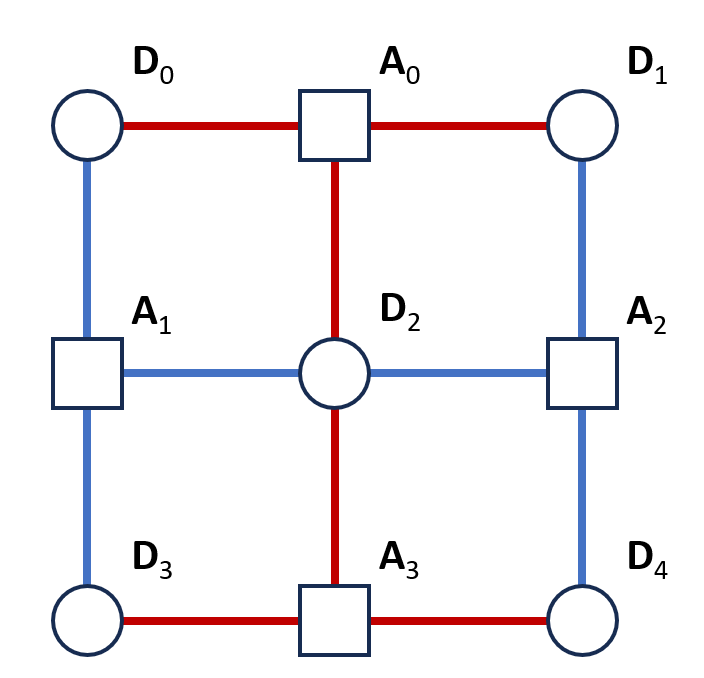

In [234]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, execute, Aer
from qiskit.visualization import plot_histogram

In [425]:
# mapping A -> Xd
XD = {
    0:[0,1,2],
    3:[2,3,4]
}

# mapping A -> Zd
ZD = {
    1: [0,2,3],
    2: [1,2,4]
}


def find_A(err_type, value):
    if err_type == 'x':
        data = XD
    if err_type == 'z':
        data = ZD
    keys = [key for key, values in data.items() if value in values]
    return keys

# err_type has to be 'x' or 'z' 
def initialize_surface_code(err_type=None, err_index=None, measure=True):
    # n is the total number of qubits
    # k is the number of logical qubits
    n=5
    k=1
    m = n-k
    D = QuantumRegister(n, 'D')
    A = QuantumRegister(m, 'A')
    CA = ClassicalRegister(m)

    qc = QuantumCircuit(D,A, CA)
    
    if err_type is not None and err_type not in ['x', 'z']:
        raise ValueError("err_type must be 'x' or 'z'")
        
    if err_index is not None and not str.isdigit(str(err_index)):
        raise ValueError(f"err_index must be integer number")
    
    _i = None
    if err_type is not None and err_index is not None:
        qc.x(D[err_index])
        _i = find_A(err_type, err_index)
    
    
    for a in range(m):
        qc.h(A[a])

    qc.barrier()
    
    for a in XD.keys():
        for d in XD[a]:
            qc.cx(A[a],D[d])
        qc.barrier()

    for a in ZD.keys():
        for d in ZD[a]:
            qc.cz(A[a], D[d])
        qc.barrier()

    for a in range(m):
        qc.h(A[a])
    
    if measure:
        qc.measure(A, CA)


    return qc

# errs = err index -> err type , for example: {0:'x', 2:'z'}
#

def surface_code_with_error(errs, draw=True):
    qc1 = initialize_surface_code(measure=False)
    qc1.barrier()
    
    for i in errs.keys():
        if errs[i]=='x':
            qc1.x(i)
        elif errs[i]=='z':
            qc1.z(i)

    qc1.barrier()
    qc2 = initialize_surface_code()
    
    qc = qc1.compose(qc2)

    simulator = Aer.get_backend('qasm_simulator')
    result = execute(qc, simulator, shots=1024).result()
    counts = result.get_counts(qc)
    
    if draw:
        display(qc.draw('mpl', fold=-1))
        display(plot_histogram(counts))

    return list(counts.keys())

## $(a.1) \quad D_0(z) \rightarrow A_1$

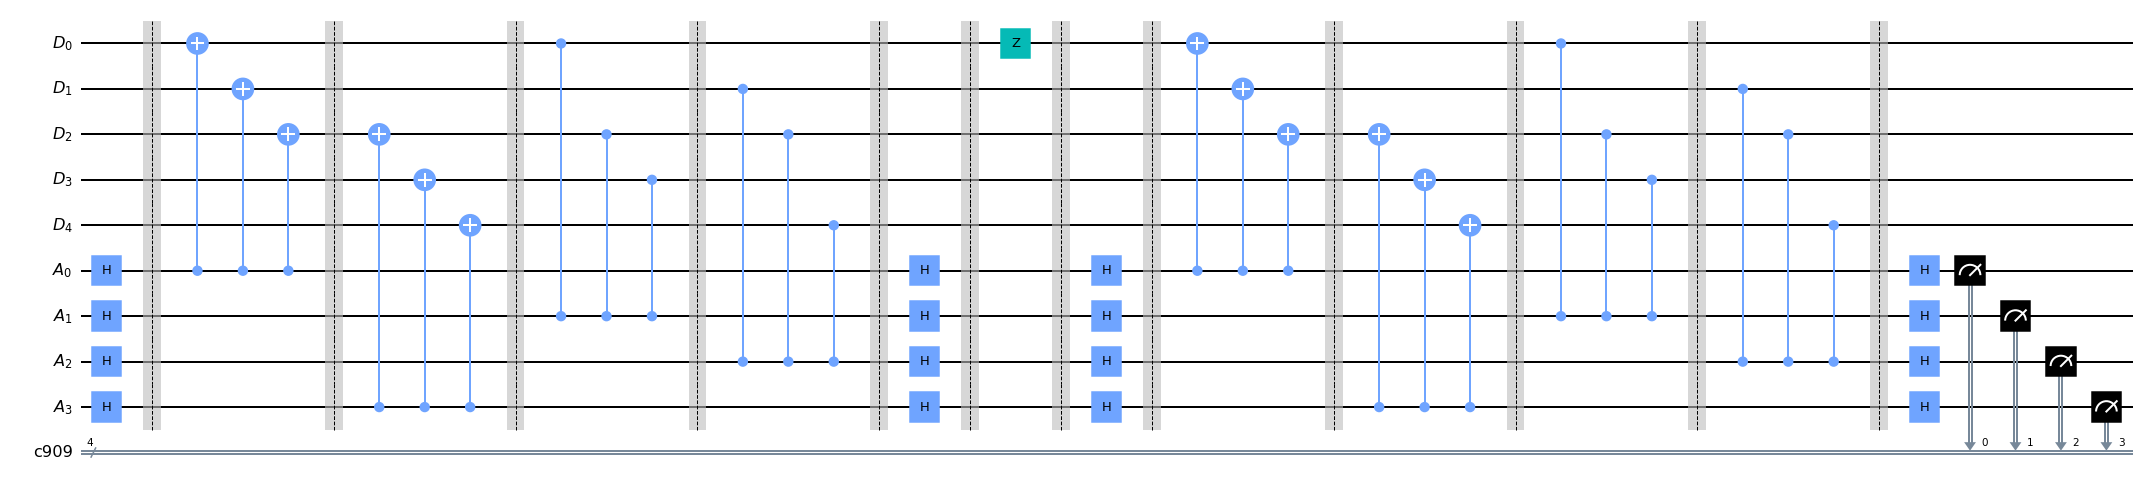

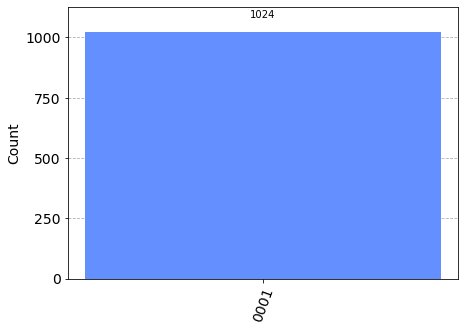

['0001']

In [442]:
err = {0:'z'}
surface_code_with_error(err)

## $(a.2) \quad D_4(x) \rightarrow A_3$

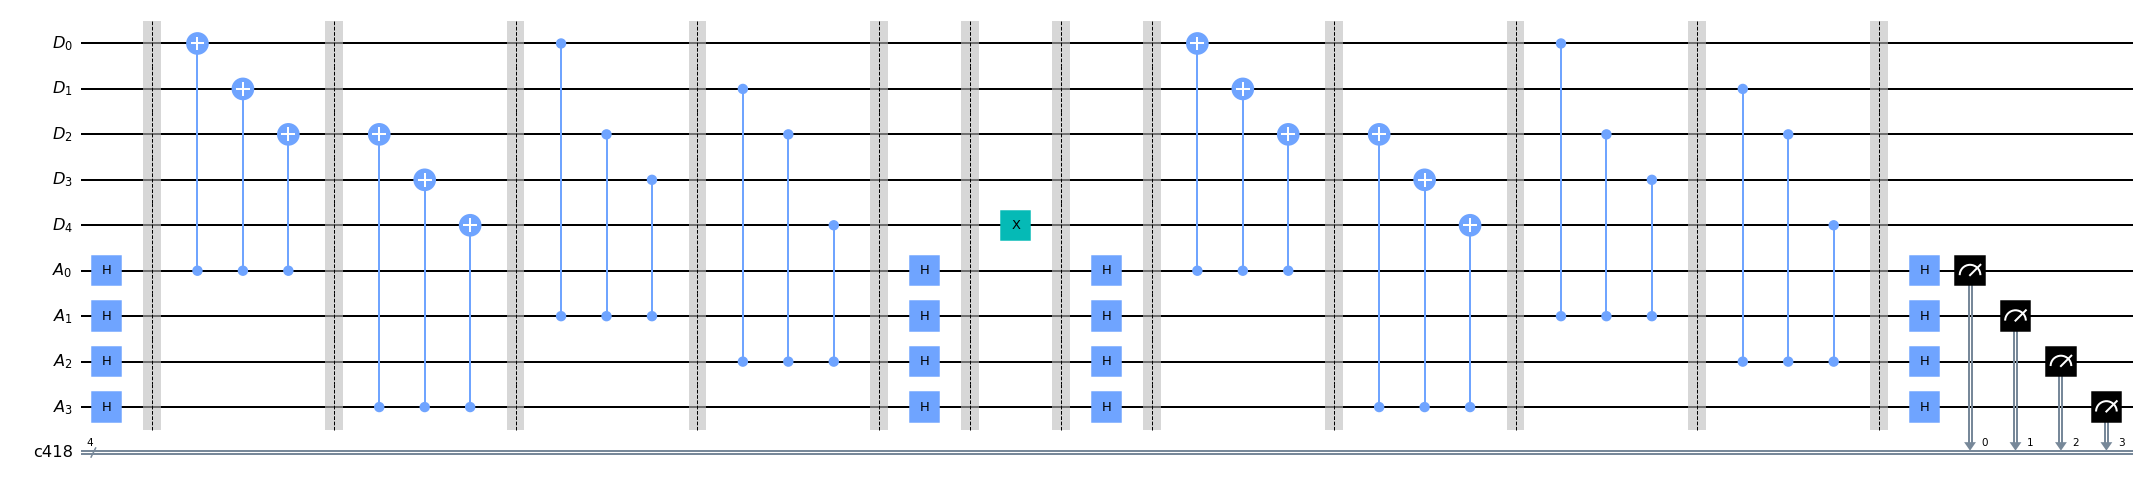

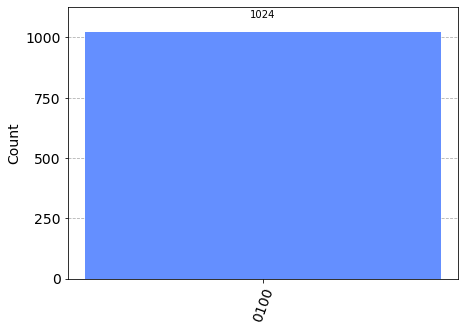

['0100']

In [427]:
err = {4:'x'}
surface_code_with_error(err)

## $(b) \quad D_3(x) \rightarrow A_2$

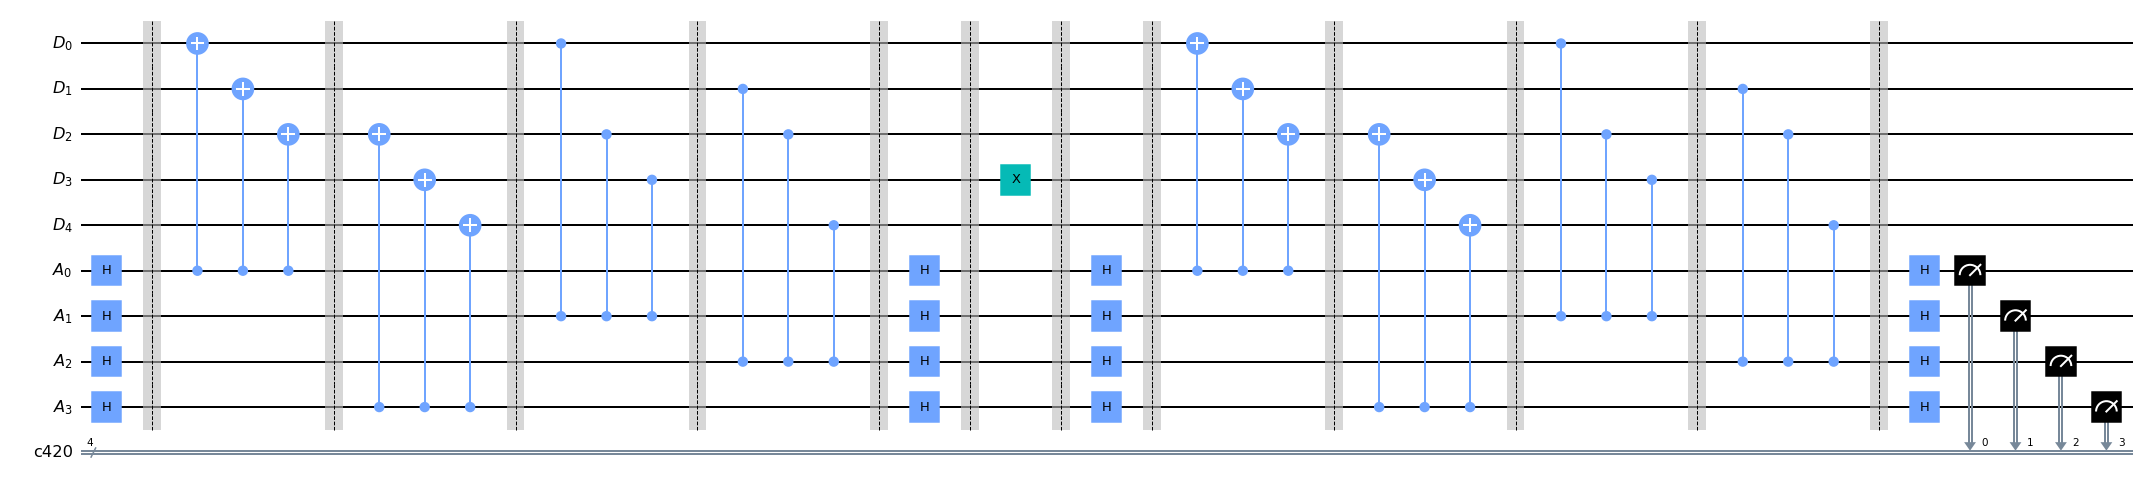

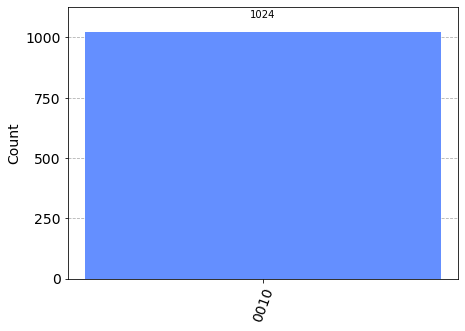

['0010']

In [428]:
err = {3:'x'}
surface_code_with_error(err)

## $(c) \quad All \: Errors \: For \: Bit-Flip \: \& \: Phase-Flip$

In [444]:
for i1 in range(5):
    for t1 in ['x', 'z']:
        errs = {i1:t1}
        print(f'D{i1}({t1}) ->', surface_code_with_error(errs, draw=False))

D0(x) -> ['0010']
D0(z) -> ['0001']
D1(x) -> ['0100']
D1(z) -> ['0001']
D2(x) -> ['0110']
D2(z) -> ['1001']
D3(x) -> ['0010']
D3(z) -> ['1000']
D4(x) -> ['0100']
D4(z) -> ['1000']


## $(Exter) \quad All \: Errors \: of \: Two \: Qubits \: For \: Bit-Flip \: \& \: Phase-Flip$

In [443]:
for i1 in range(5):
    for t1 in ['x', 'z']:
        for i2 in range(i1+1, 5):
            for t2 in ['x', 'z']:
                errs = {i1:t1, i2:t2}
                print(f'D{i1}({t1}), D{i2}({t2}) ->', surface_code_with_error(errs, draw=False))

D0(x), D1(x) -> ['0110']
D0(x), D1(z) -> ['0011']
D0(x), D2(x) -> ['0100']
D0(x), D2(z) -> ['1011']
D0(x), D3(x) -> ['0000']
D0(x), D3(z) -> ['1010']
D0(x), D4(x) -> ['0110']
D0(x), D4(z) -> ['1010']
D0(z), D1(x) -> ['0101']
D0(z), D1(z) -> ['0000']
D0(z), D2(x) -> ['0111']
D0(z), D2(z) -> ['1000']
D0(z), D3(x) -> ['0011']
D0(z), D3(z) -> ['1001']
D0(z), D4(x) -> ['0101']
D0(z), D4(z) -> ['1001']
D1(x), D2(x) -> ['0010']
D1(x), D2(z) -> ['1101']
D1(x), D3(x) -> ['0110']
D1(x), D3(z) -> ['1100']
D1(x), D4(x) -> ['0000']
D1(x), D4(z) -> ['1100']
D1(z), D2(x) -> ['0111']
D1(z), D2(z) -> ['1000']
D1(z), D3(x) -> ['0011']
D1(z), D3(z) -> ['1001']
D1(z), D4(x) -> ['0101']
D1(z), D4(z) -> ['1001']
D2(x), D3(x) -> ['0100']
D2(x), D3(z) -> ['1110']
D2(x), D4(x) -> ['0010']
D2(x), D4(z) -> ['1110']
D2(z), D3(x) -> ['1011']
D2(z), D3(z) -> ['0001']
D2(z), D4(x) -> ['1101']
D2(z), D4(z) -> ['0001']
D3(x), D4(x) -> ['0110']
D3(x), D4(z) -> ['1010']
D3(z), D4(x) -> ['1100']
D3(z), D4(z) -> ['0000']


## Observations

When two bit-flips occur vertically on either the right or the left edge, the error will not be detected. Similarly, when two phase-flips occur horizontally on either the top or bottom edge, the error will also go undetected.
$$ D_0(x), D_3(x) \rightarrow 0000 \\ $$
$$ D_1(x), D_4(x) \rightarrow 0000 \\ $$
$$ D_0(z), D_1(z) \rightarrow 0000 \\ $$
$$ D_4(z), D_4(z) \rightarrow 0000 $$
